In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..\..\..\..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.constants.events import select_sc19
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.roles import Roles
from triple_agent.classes.outcomes import WinType
from triple_agent.classes.missions import Missions, MissionStatus
from triple_agent.classes.venues import Venue
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins, sort_by_sniper_wins
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties, PlotLabelStyle
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.specific.mission_choices import mission_choices
from triple_agent.reports.specific.mission_completes import (mission_completion_query,
    mission_completion,
    _mission_completes_details)
from triple_agent.reports.generation.generic_query import query
from triple_agent.reports.generation.plot_specs import DataQueryProperties, AxisProperties
from triple_agent.classes.action_tests import ActionTest
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
from itertools import zip_longest
from datetime import datetime, timedelta

In [4]:
event = 'SCL6'

In [5]:
replays = get_parsed_replays(lambda g: g.event == event)

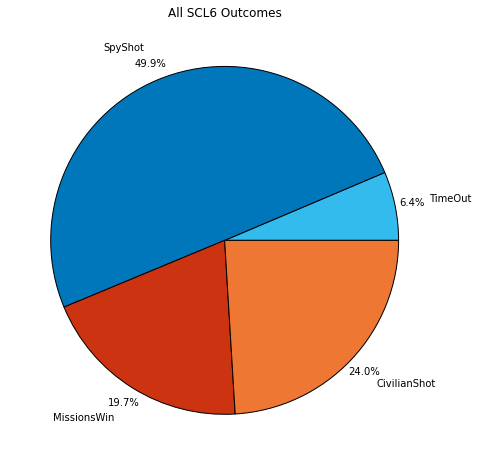

,WinType.TimeOut,WinType.SpyShot,WinType.MissionsWin,WinType.CivilianShot
NaN,172,1345,531,648


In [6]:
game_outcomes(
    replays,
    axis_properties=AxisProperties(title=f"All {event} Outcomes")
).frame

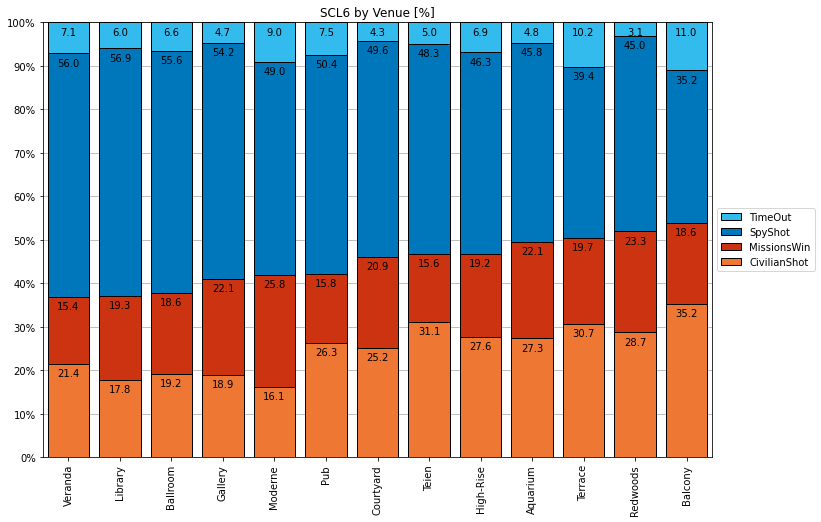

,Venue.Veranda,Venue.Library,Venue.Ballroom,Venue.Gallery,Venue.Moderne,Venue.Pub,Venue.Courtyard,Venue.Teien,Venue.HighRise,Venue.Aquarium,Venue.Terrace,Venue.Redwoods,Venue.Balcony
WinType.TimeOut,0.071429,0.060241,0.065617,0.047368,0.090323,0.075188,0.042636,0.050000,0.068966,0.047970,0.102190,0.031008,0.110345
WinType.SpyShot,0.560440,0.569277,0.556430,0.542105,0.490323,0.503759,0.496124,0.483333,0.463054,0.457565,0.394161,0.449612,0.351724
WinType.MissionsWin,0.153846,0.192771,0.186352,0.221053,0.258065,0.157895,0.209302,0.155556,0.192118,0.221402,0.197080,0.232558,0.186207
WinType.CivilianShot,0.214286,0.177711,0.191601,0.189474,0.161290,0.263158,0.251938,0.311111,0.275862,0.273063,0.306569,0.286822,0.351724


In [7]:
game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.venue,
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True,
    ),
    axis_properties=AxisProperties(
        title=f"{event} by Venue [%]",
        data_label_style=PlotLabelStyle.Plain,
    )
).frame

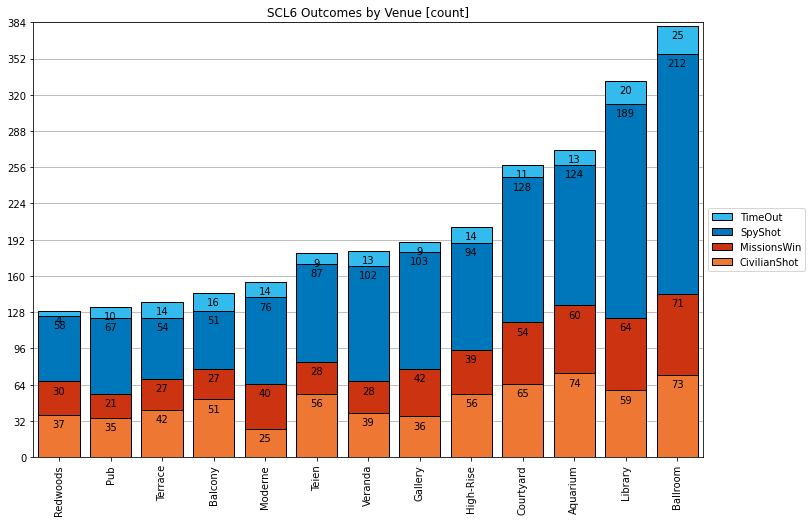

,Venue.Redwoods,Venue.Pub,Venue.Terrace,Venue.Balcony,Venue.Moderne,Venue.Teien,Venue.Veranda,Venue.Gallery,Venue.HighRise,Venue.Courtyard,Venue.Aquarium,Venue.Library,Venue.Ballroom
WinType.TimeOut,4,10,14,16,14,9,13,9,14,11,13,20,25
WinType.SpyShot,58,67,54,51,76,87,102,103,94,128,124,189,212
WinType.MissionsWin,30,21,27,27,40,28,28,42,39,54,60,64,71
WinType.CivilianShot,37,35,42,51,25,56,39,36,56,65,74,59,73


In [8]:
game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.venue,
        secondary_order=sum,
    ),
    axis_properties=AxisProperties(
        title=f"{event} Outcomes by Venue [count]",
        data_label_style=PlotLabelStyle.Plain,
    )
).frame

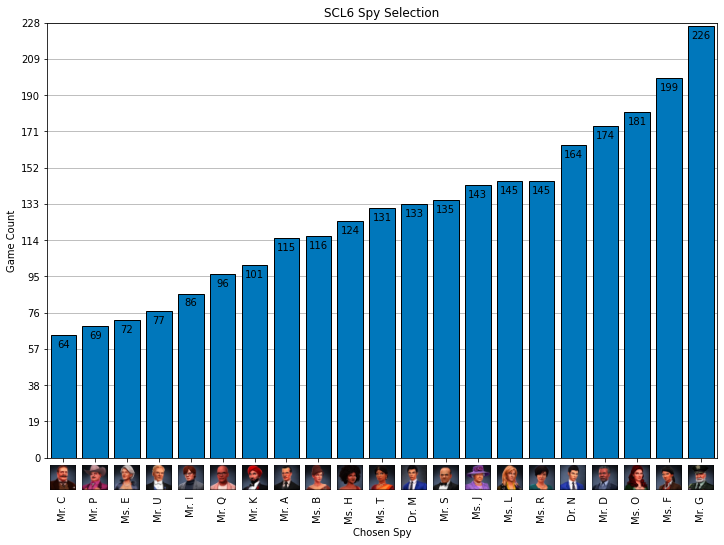

In [9]:
_ = spy_selection(
    replays,
    axis_properties = AxisProperties(
        title=f"{event} Spy Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Spy",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

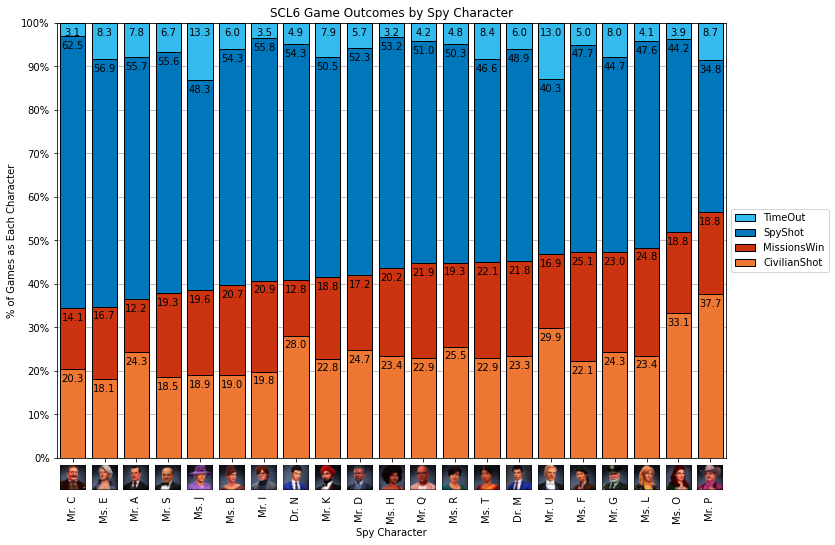

In [10]:
_ = game_outcomes(
    replays,
    axis_properties = AxisProperties(
        title=f"{event} Game Outcomes by Spy Character",
        x_axis_portrait=True,
        y_axis_label="% of Games as Each Character",
        x_axis_label="Spy Character",
        data_label_style=PlotLabelStyle.Plain,
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True
    )
)

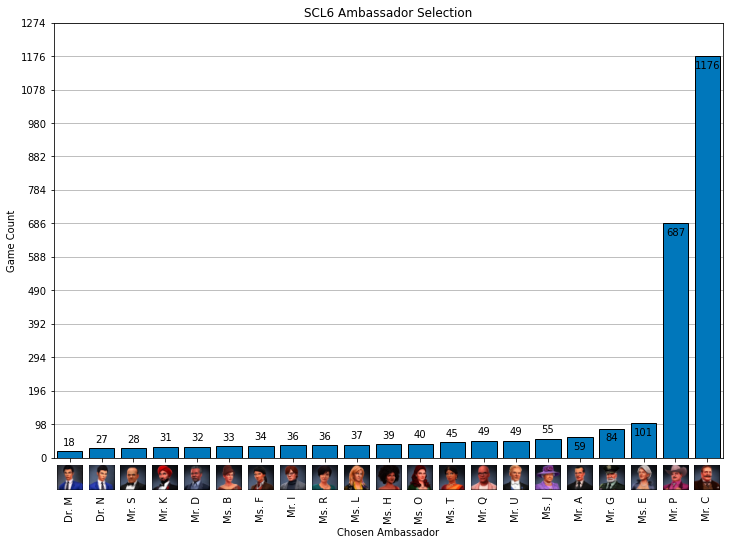

In [11]:
_ = amba_selection(
    replays,
    axis_properties = AxisProperties(
        title=f"{event} Ambassador Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Ambassador",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

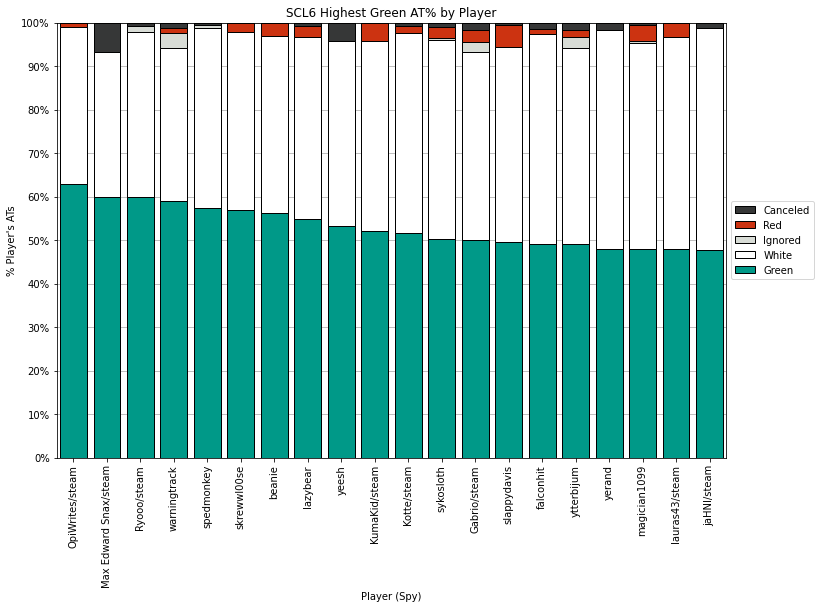

In [12]:
_ = action_test_percentages(
    replays,
    axis_properties = AxisProperties(
        title=f'{event} Highest Green AT% by Player',
        x_axis_label='Player (Spy)',
        y_axis_label='% Player\'s ATs',
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=lambda name_series: -name_series[1][ActionTest.Green],
        reverse_primary_order=True,
        percent_normalized_data=True,
        limit=20
    )    
)

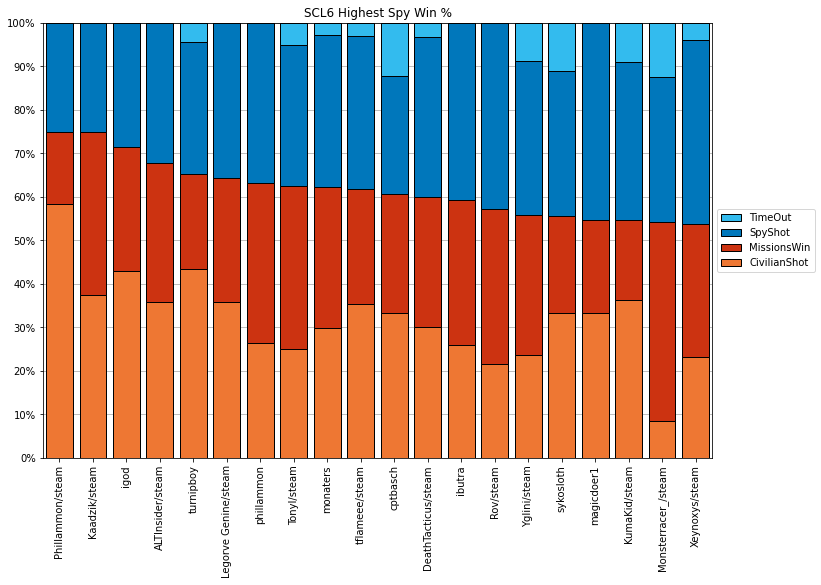

In [13]:
spy_winr = game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=sort_by_spy_wins,
        reverse_secondary_order=True,
        percent_normalized_data=True,
        limit=20
    ),
    axis_properties=AxisProperties(title=f"{event} Highest Spy Win %")
)

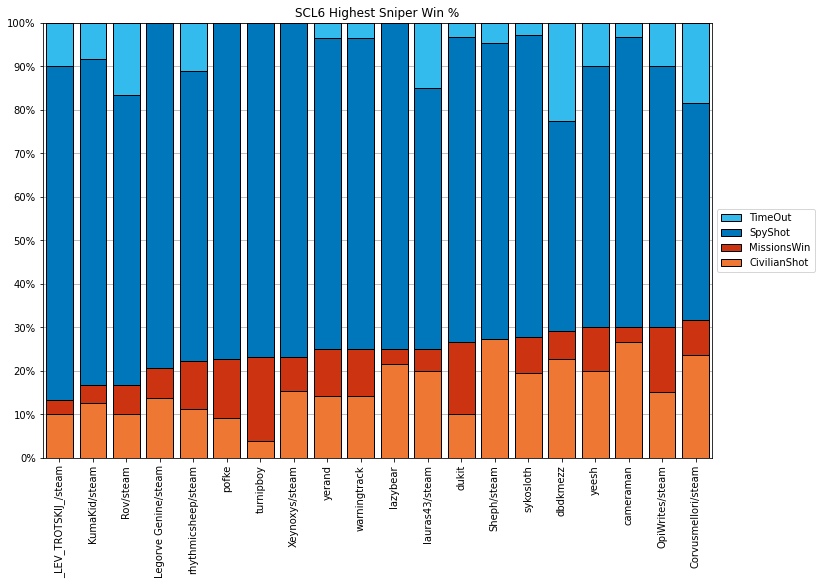

In [14]:
_ = game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.sniper,
        secondary_order=sort_by_sniper_wins,
        reverse_secondary_order=True,
        percent_normalized_data=True,
        limit=20
    ),
    axis_properties=AxisProperties(title=f"{event} Highest Sniper Win %")
)

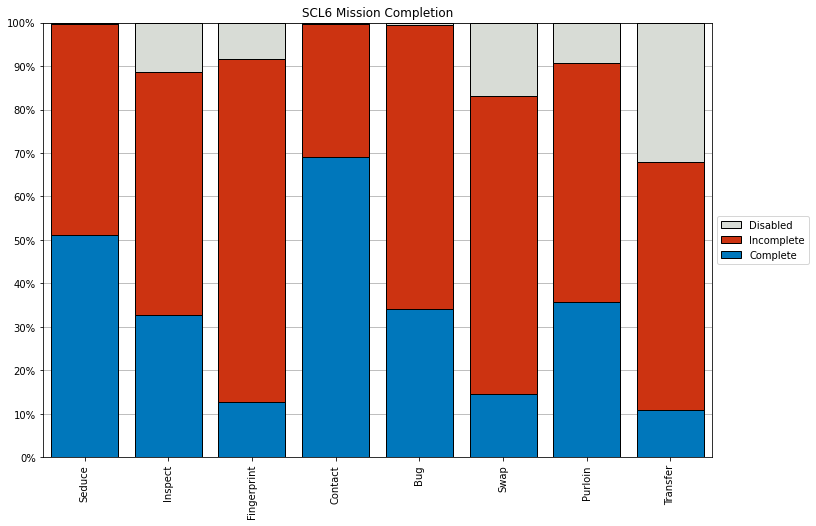

In [15]:
mission_completion(replays, f"{event} Mission Completion")

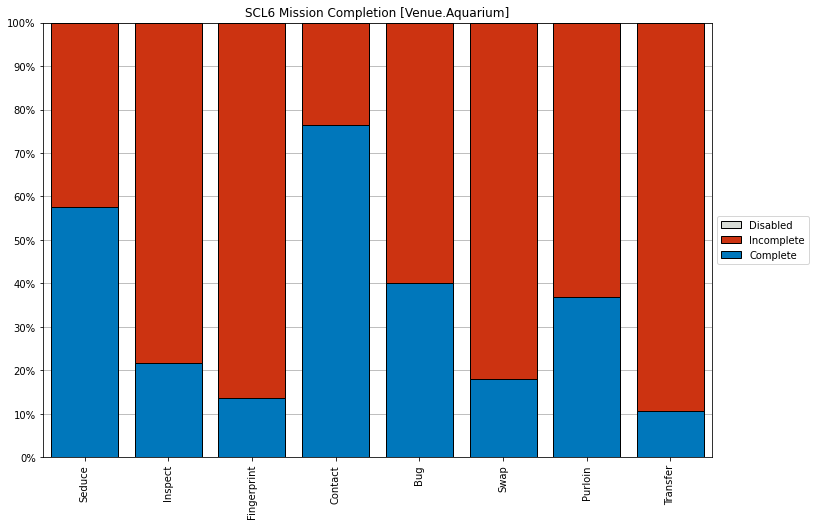

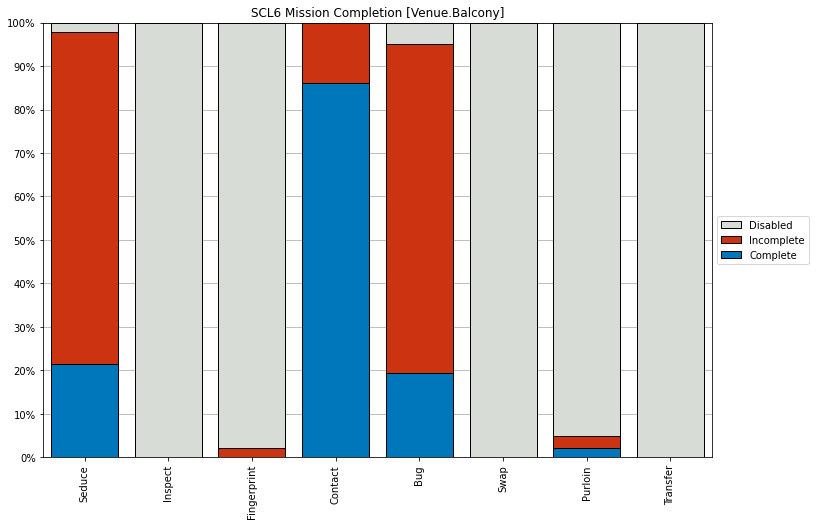

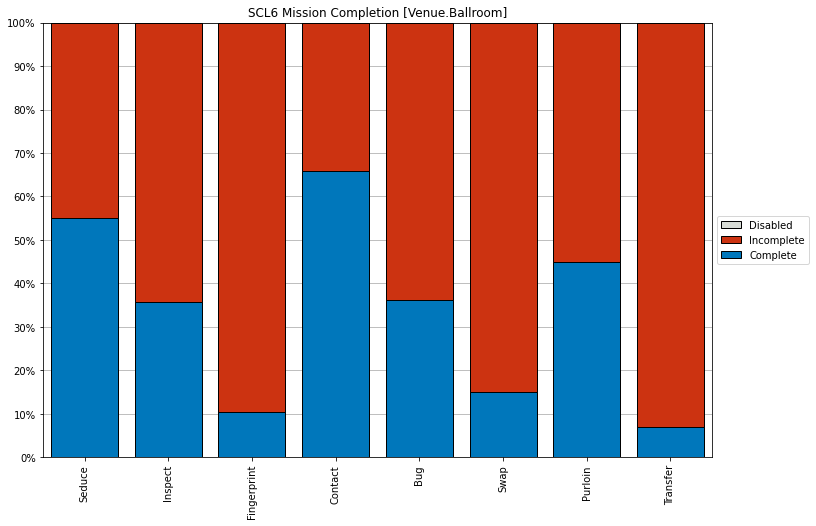

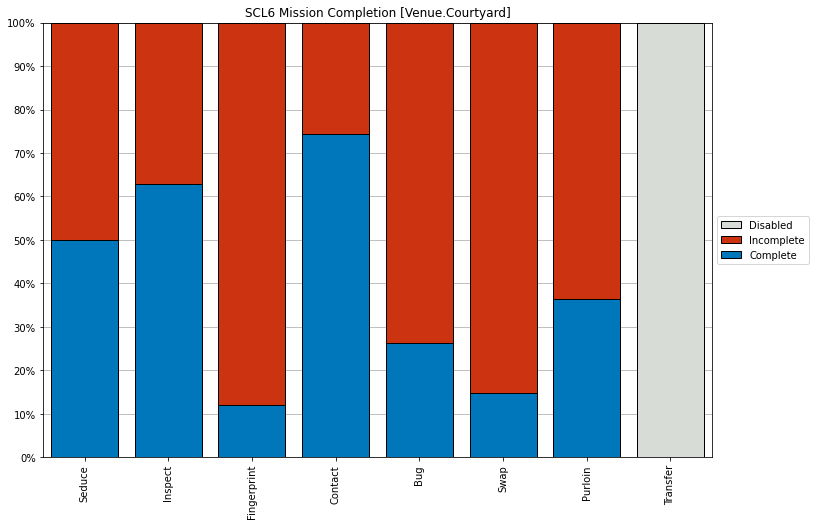

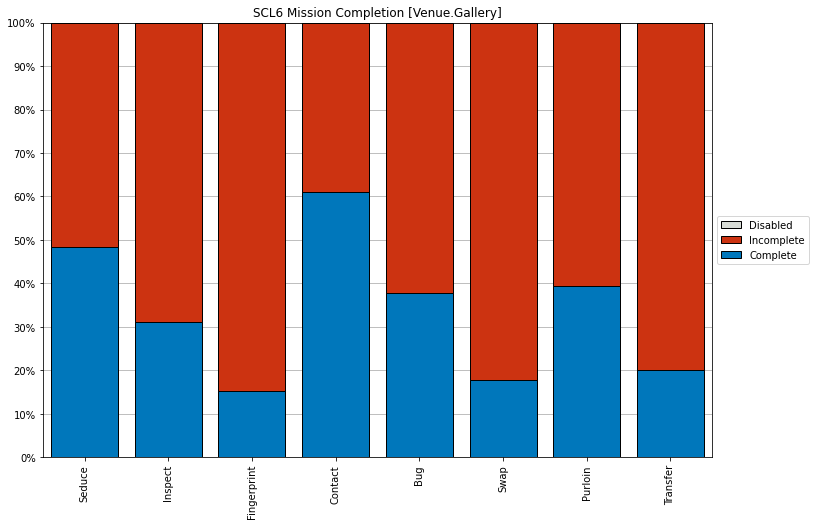

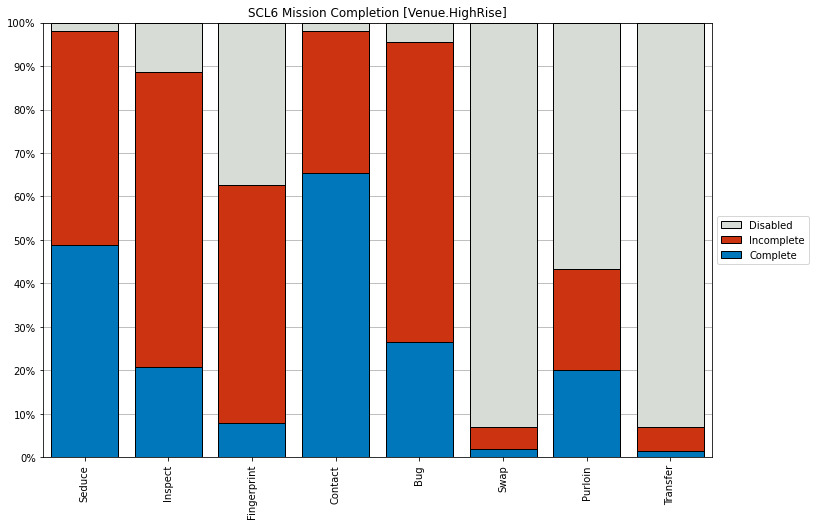

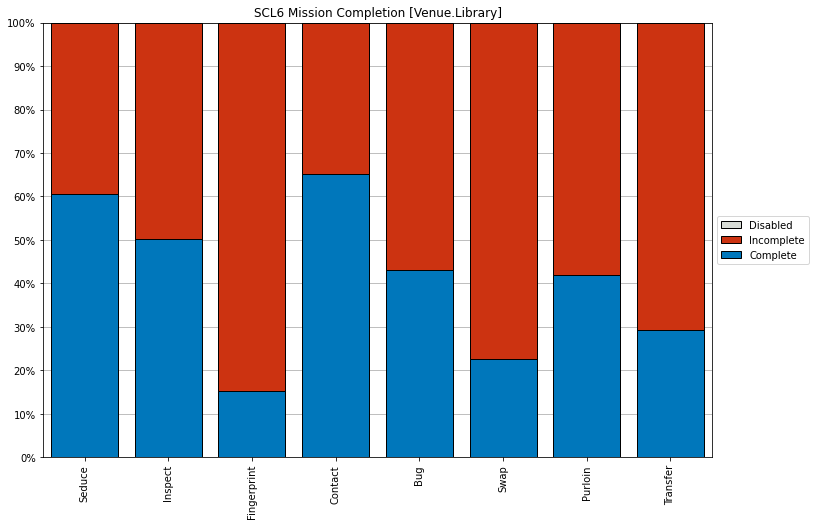

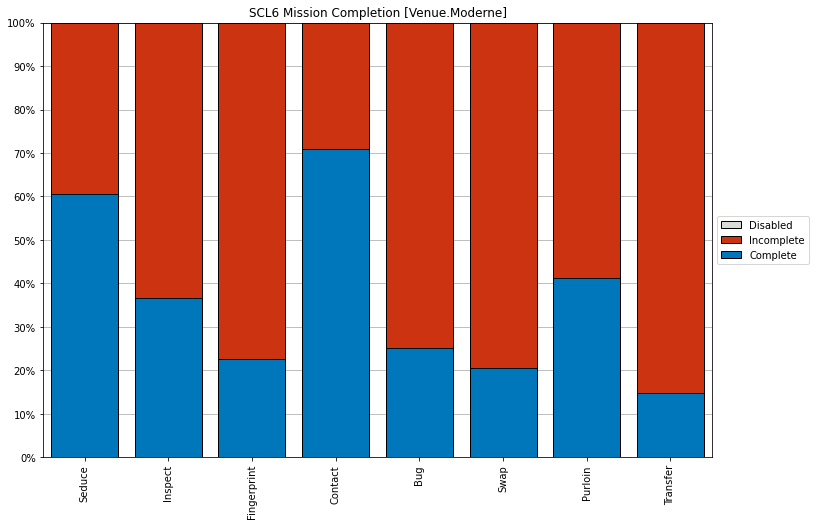

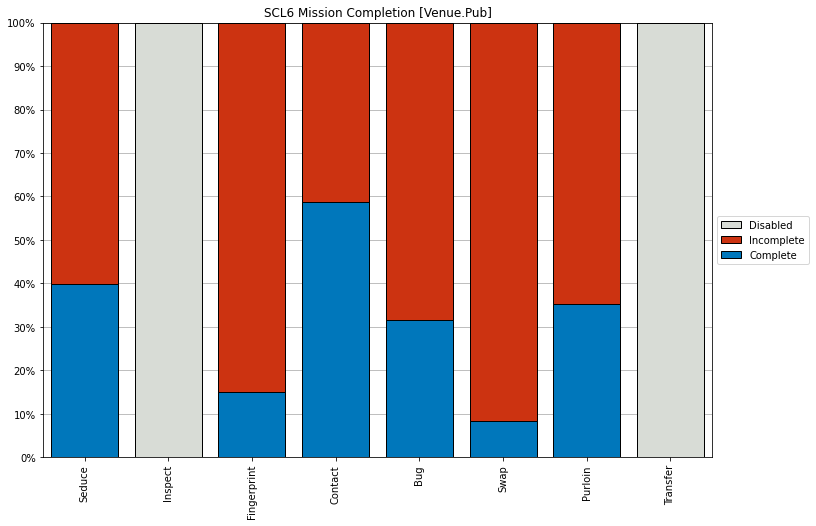

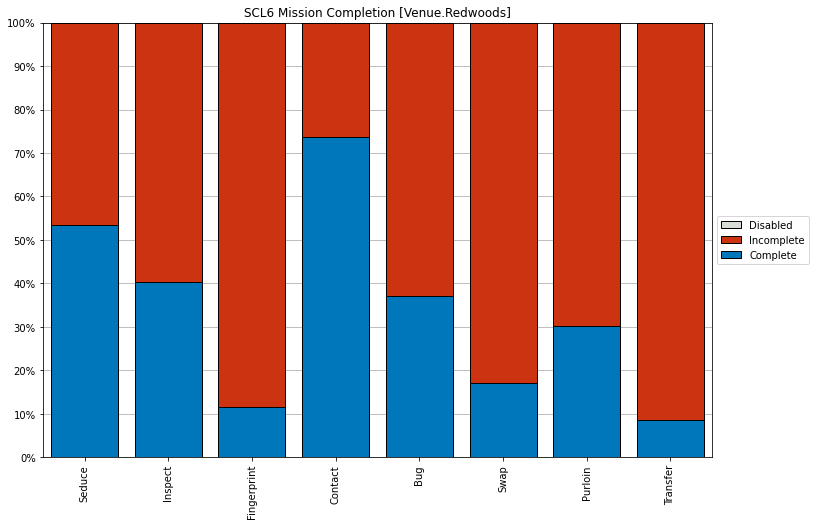

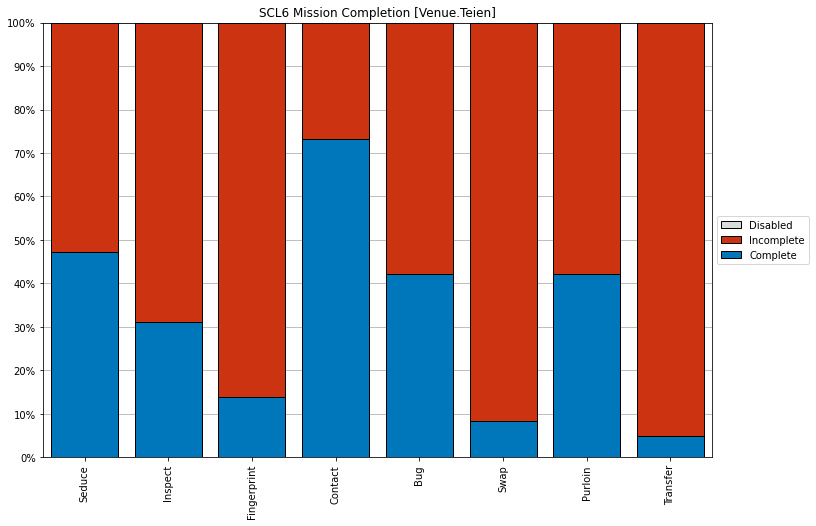

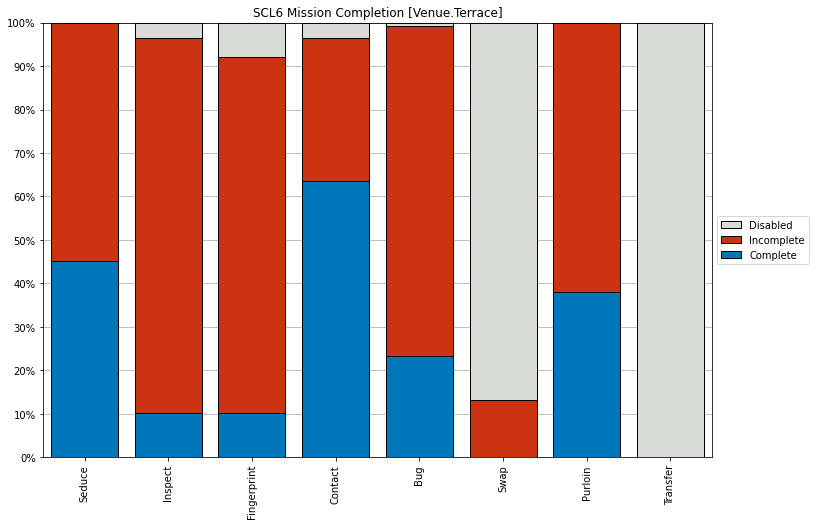

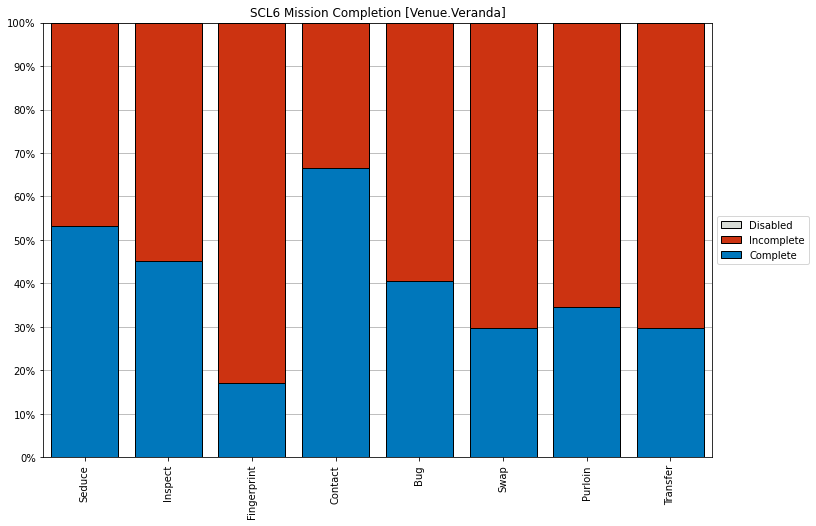

In [16]:
for venue in sorted(set([g.venue for g in replays])):
    mission_completion(list(filter(lambda g: g.venue == venue, replays)), f"{event} Mission Completion [{venue}]")

In [17]:
WEEK_1_START = datetime.fromisoformat("2020-05-03T08:00:00") # midnight pacific is 8AM UTC
NUM_WEEKS = 21 # overshoot regular season a bit, just to make sure

In [18]:
WEEK_STARTS = [WEEK_1_START + timedelta(days=7 * n) for n in range(NUM_WEEKS)]

In [19]:
WEEK_STARTS

[datetime.datetime(2020, 5, 3, 8, 0),
 datetime.datetime(2020, 5, 10, 8, 0),
 datetime.datetime(2020, 5, 17, 8, 0),
 datetime.datetime(2020, 5, 24, 8, 0),
 datetime.datetime(2020, 5, 31, 8, 0),
 datetime.datetime(2020, 6, 7, 8, 0),
 datetime.datetime(2020, 6, 14, 8, 0),
 datetime.datetime(2020, 6, 21, 8, 0),
 datetime.datetime(2020, 6, 28, 8, 0),
 datetime.datetime(2020, 7, 5, 8, 0),
 datetime.datetime(2020, 7, 12, 8, 0),
 datetime.datetime(2020, 7, 19, 8, 0),
 datetime.datetime(2020, 7, 26, 8, 0),
 datetime.datetime(2020, 8, 2, 8, 0),
 datetime.datetime(2020, 8, 9, 8, 0),
 datetime.datetime(2020, 8, 16, 8, 0),
 datetime.datetime(2020, 8, 23, 8, 0),
 datetime.datetime(2020, 8, 30, 8, 0),
 datetime.datetime(2020, 9, 6, 8, 0),
 datetime.datetime(2020, 9, 13, 8, 0),
 datetime.datetime(2020, 9, 20, 8, 0)]

In [20]:
def was_game_on_time(games, data_dictionary):
    for game in games:
        if game.week is not None:
            start = WEEK_STARTS[game.week-1]
            end = WEEK_STARTS[game.week]

            on_time = start < game.start_time < end
            
            data_dictionary[on_time] += 1

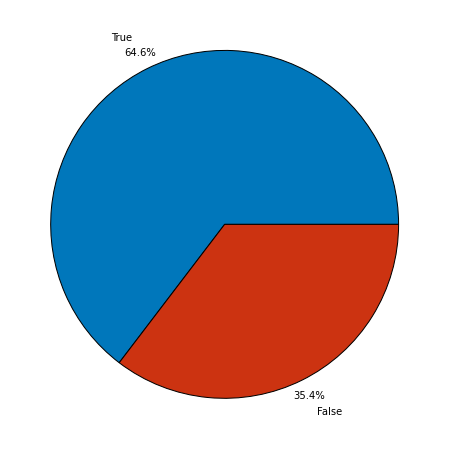

In [21]:
_=query(
    replays,
    data_query=DataQueryProperties(
        query_function=was_game_on_time
    )
)

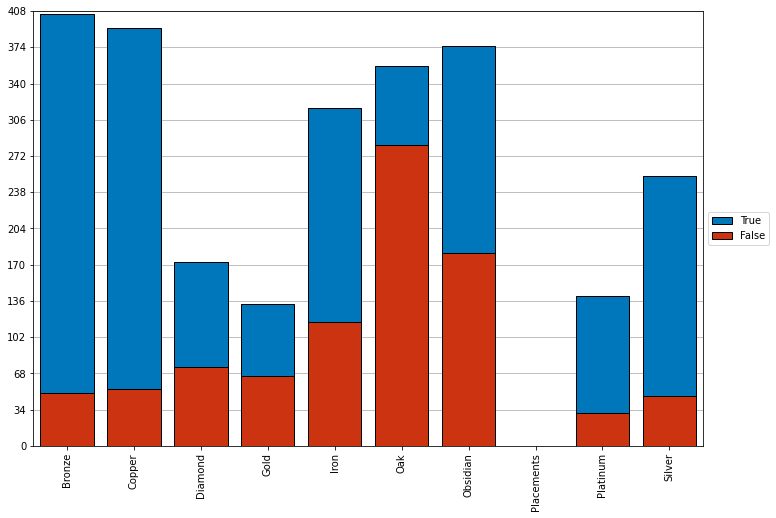

In [22]:
_=query(
    replays,
    data_query=DataQueryProperties(
        query_function=was_game_on_time,
        groupby=lambda g: g.division
    )
)